In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/home/boss/Downloads/Bank Customer Churn Prediction.csv")
data.head(15)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [5]:
categorical_cols=[x for x in X.columns if X[x].dtype=='object']
numeric_cols=[x for x in X.columns if X[x].dtype!='object']
numeric_cols=numeric_cols[1:]
numeric_cols

['credit_score',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary']

In [6]:
X[numeric_cols].describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [7]:
X[numeric_cols].corr()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


<AxesSubplot:>

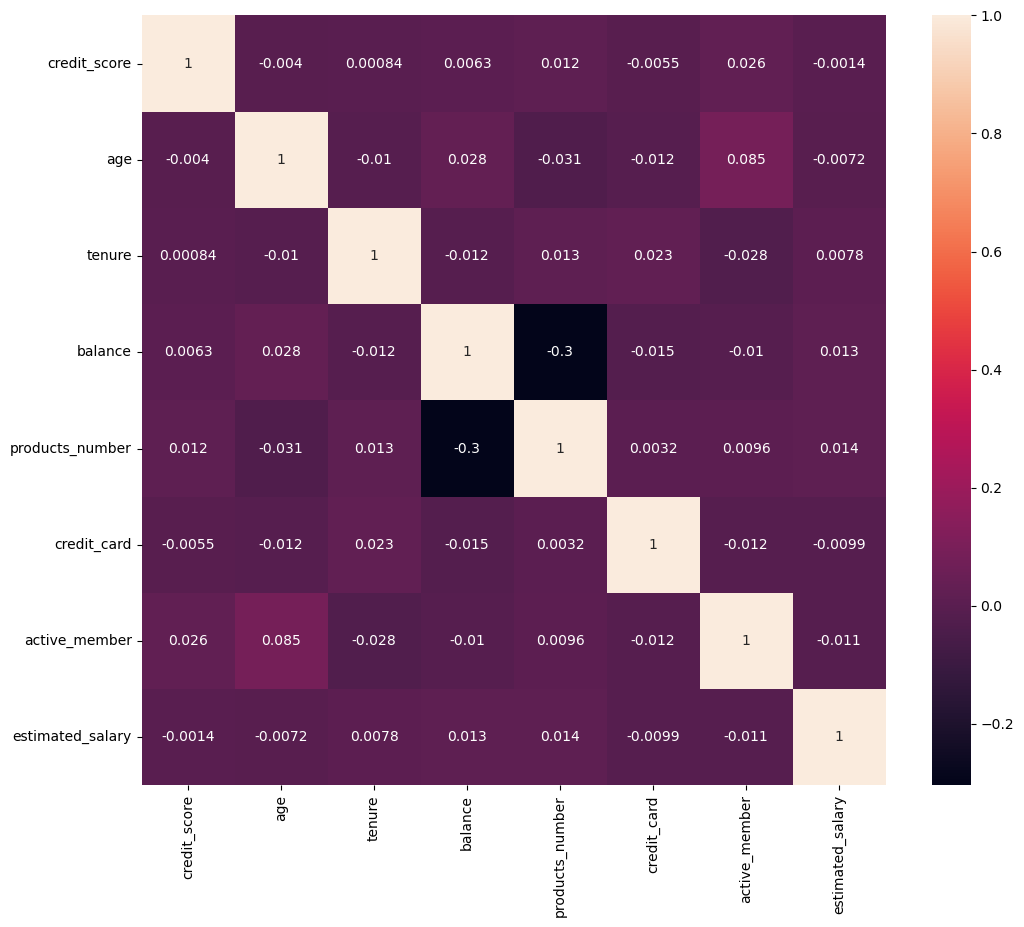

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(X[numeric_cols].corr(),annot=True)

In [95]:
X.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
dtype: int64

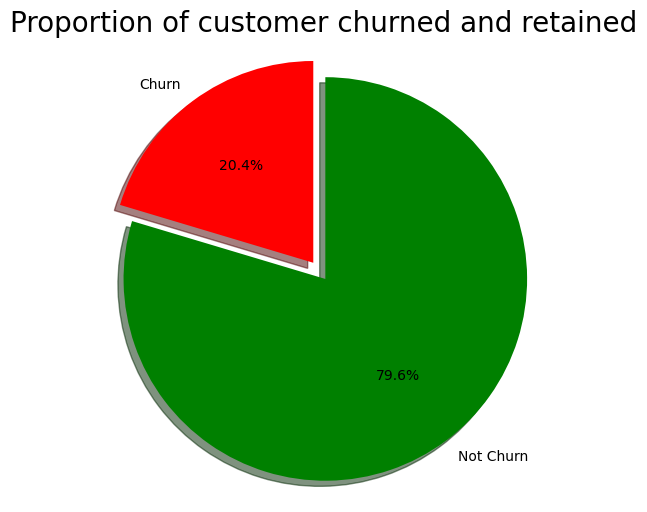

In [10]:
labels = 'Churn', 'Not Churn'
sizes = [data.churn[data['churn']==1].count(), data.churn[data['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode,colors=('red','green'),labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


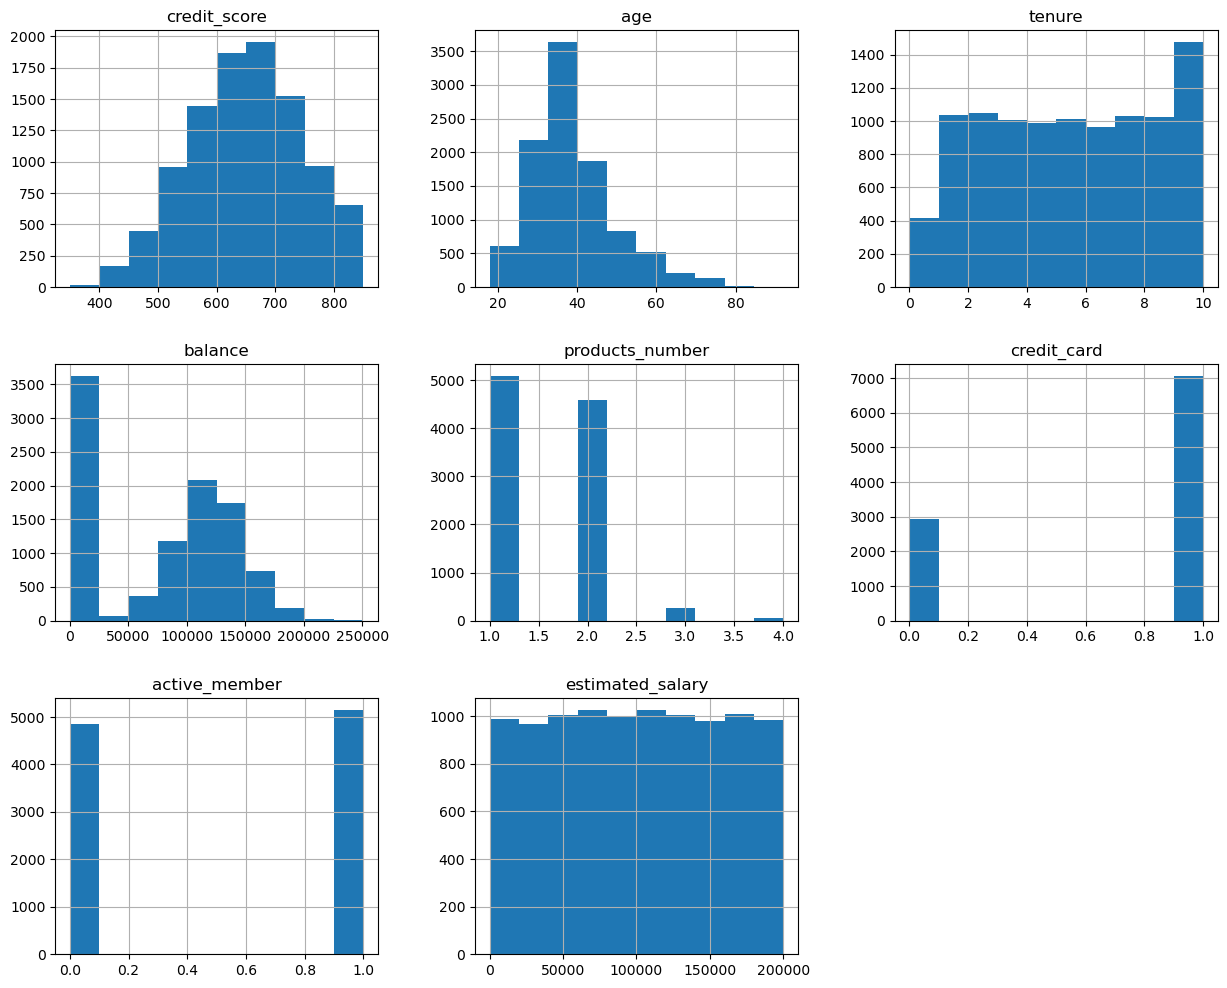

In [11]:
X[numeric_cols].hist(figsize=(15,12))
plt.legend()

<AxesSubplot:xlabel='active_member', ylabel='count'>

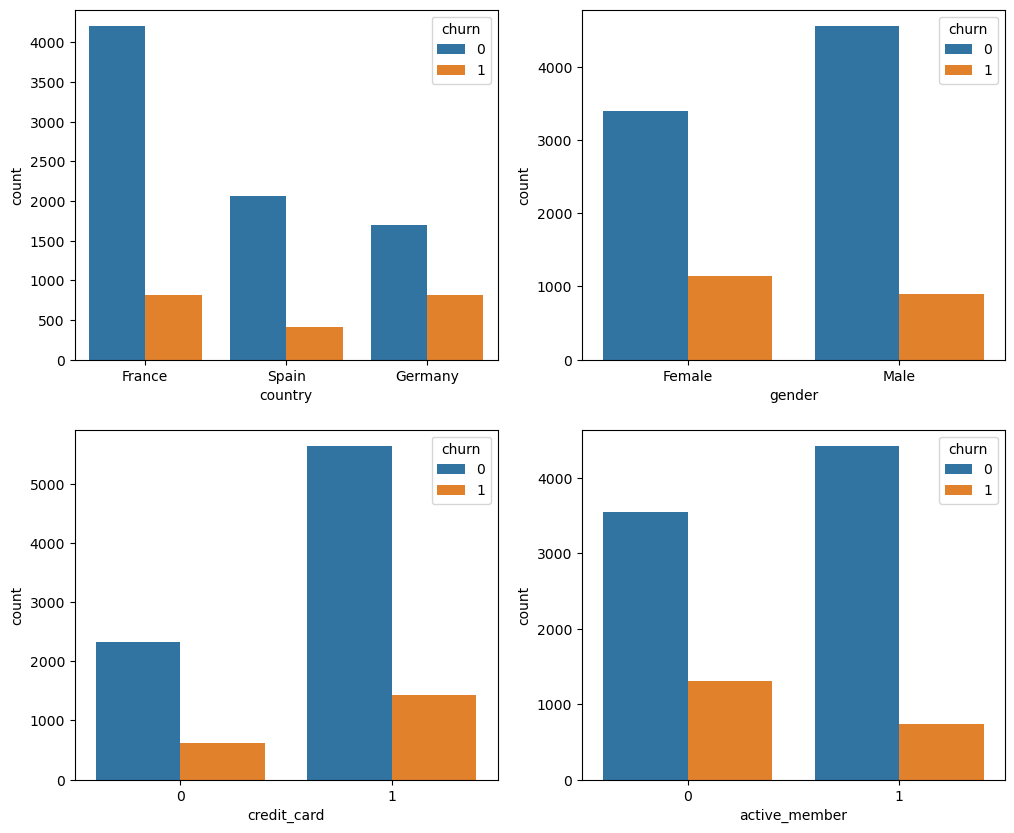

In [12]:

fig,axarr=plt.subplots(2,2,figsize=(12,10))
sns.countplot(x='country',hue='churn',data=data,ax=axarr[0][0])
sns.countplot(x='gender', hue = 'churn',data = data, ax=axarr[0][1])
sns.countplot(x='credit_card', hue = 'churn',data = data, ax=axarr[1][0])
sns.countplot(x='active_member', hue = 'churn',data = data, ax=axarr[1][1])

<AxesSubplot:xlabel='churn', ylabel='estimated_salary'>

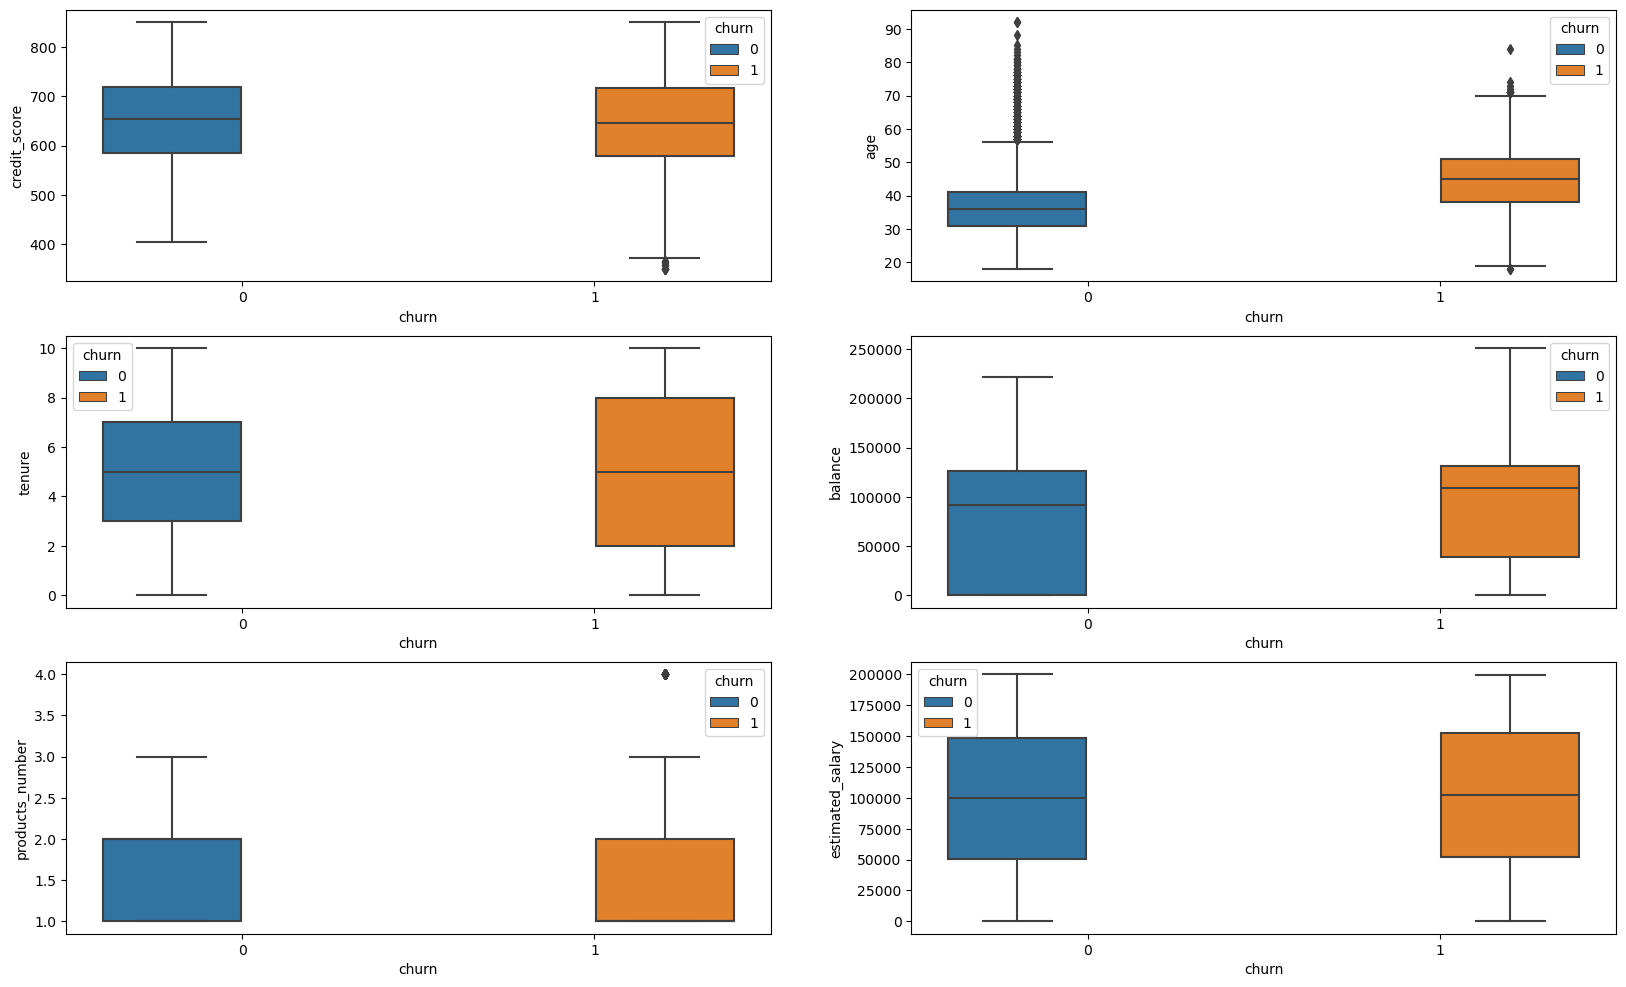

In [13]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='credit_score',x = 'churn', hue = 'churn',data = data, ax=axarr[0][0])
sns.boxplot(y='age',x = 'churn', hue = 'churn',data = data , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'churn', hue = 'churn',data = data, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'churn', hue = 'churn',data = data, ax=axarr[1][1])
sns.boxplot(y='products_number',x = 'churn', hue = 'churn',data = data, ax=axarr[2][0])
sns.boxplot(y='estimated_salary',x = 'churn', hue = 'churn',data = data, ax=axarr[2][1])

In [114]:
data_train = data.sample(frac=0.8,random_state=41)
data_test = data.drop(data_train.index)
print(len(data_train))
print(len(data_test))

8000
2000


In [115]:
data_train.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9745,15603883,818,France,Male,36,4,0.00,2,1,1,8037.03,0
4492,15773260,590,France,Female,32,0,127763.24,1,1,0,100717.54,0
3439,15662063,746,France,Male,36,7,142400.77,1,1,1,193438.69,0
6077,15738588,660,Germany,Female,37,2,133200.09,1,0,0,71433.88,0
5372,15688973,598,Spain,Female,39,5,0.00,2,1,1,83103.46,0



# Feature engineering

We need to add features that are likely to have an impact on the probability of customer churning. We first split the train and test sets

(-1.0, 5.0)

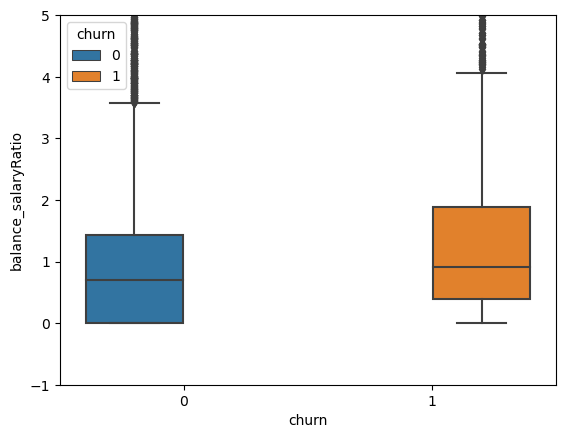

In [116]:
data_train['balance_salaryRatio'] = data_train.balance/data_train.estimated_salary
sns.boxplot(y='balance_salaryRatio',x = 'churn', hue = 'churn',data = data_train)
plt.ylim(-1, 5)

we saw that the salary has little effect on the probability of a customer churning. However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of loan capital.

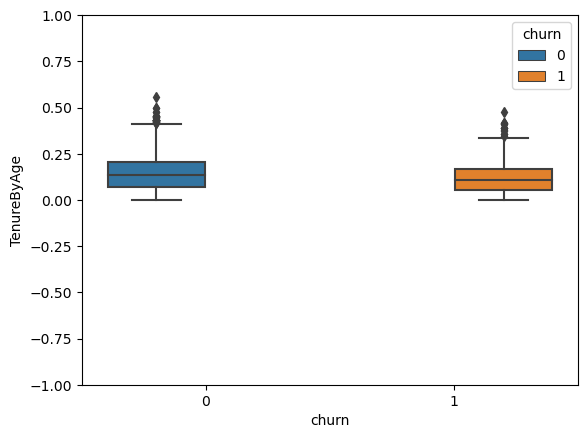

In [117]:
data_train['TenureByAge'] = data_train.tenure/(data_train.age)
sns.boxplot(y='TenureByAge',x = 'churn', hue = 'churn',data = data_train)
plt.ylim(-1, 1)
plt.show()

Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:

In [118]:
data_train['CreditScoreGivenAge'] = data_train.credit_score/(data_train.age)

Lastly we introduce a variable to capture credit score given age to take into account credit behavior

In [119]:
data_train.head().columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn', 'balance_salaryRatio', 'TenureByAge',
       'CreditScoreGivenAge'],
      dtype='object')

In [120]:

numeric_cols=['credit_score','age','tenure','balance','products_number','estimated_salary','balance_salaryRatio','TenureByAge','CreditScoreGivenAge']
categorical_cols=['credit_card','active_member','country','gender']
data_train = data_train[['churn'] + numeric_cols + categorical_cols]
data_train.head()




,churn,credit_score,age,tenure,balance,products_number,estimated_salary,balance_salaryRatio,TenureByAge,CreditScoreGivenAge,credit_card,active_member,country,gender
9745,0,818,36,4,0.00,2,8037.03,0.000000,0.111111,22.722222,1,1,France,Male
4492,0,590,32,0,127763.24,1,100717.54,1.268530,0.000000,18.437500,1,0,France,Female
3439,0,746,36,7,142400.77,1,193438.69,0.736155,0.194444,20.722222,1,1,France,Male
6077,0,660,37,2,133200.09,1,71433.88,1.864663,0.054054,17.837838,0,0,Germany,Female
5372,0,598,39,5,0.00,2,83103.46,0.000000,0.128205,15.333333,1,1,Spain,Female


For the one hot variables, we change 0 to -1 so that the models can capture a negative relation 
where the attribute in inapplicable instead of 0

In [121]:
data_train.loc[data_train.credit_card == 0, 'credit_card'] = -1
data_train.loc[data_train.active_member == 0, 'active_member'] = -1
data_train.head()

,churn,credit_score,age,tenure,balance,products_number,estimated_salary,balance_salaryRatio,TenureByAge,CreditScoreGivenAge,credit_card,active_member,country,gender
9745,0,818,36,4,0.00,2,8037.03,0.000000,0.111111,22.722222,1,1,France,Male
4492,0,590,32,0,127763.24,1,100717.54,1.268530,0.000000,18.437500,1,-1,France,Female
3439,0,746,36,7,142400.77,1,193438.69,0.736155,0.194444,20.722222,1,1,France,Male
6077,0,660,37,2,133200.09,1,71433.88,1.864663,0.054054,17.837838,-1,-1,Germany,Female
5372,0,598,39,5,0.00,2,83103.46,0.000000,0.128205,15.333333,1,1,Spain,Female


In [122]:
remove = list()
for i in categorical_cols:
    if (data_train[i].dtype == 'str' or data_train[i].dtype == 'object'):
        for j in data_train[i].unique():
            data_train[i+'_'+j] = np.where(data_train[i] == j,1,-1)
        remove.append(i)
data_train = data_train.drop(remove, axis=1)
data_train.head()


,churn,credit_score,age,tenure,balance,products_number,estimated_salary,balance_salaryRatio,TenureByAge,CreditScoreGivenAge,credit_card,active_member,country_France,country_Germany,country_Spain,gender_Male,gender_Female
9745,0,818,36,4,0.00,2,8037.03,0.000000,0.111111,22.722222,1,1,1,-1,-1,1,-1
4492,0,590,32,0,127763.24,1,100717.54,1.268530,0.000000,18.437500,1,-1,1,-1,-1,-1,1
3439,0,746,36,7,142400.77,1,193438.69,0.736155,0.194444,20.722222,1,1,1,-1,-1,1,-1
6077,0,660,37,2,133200.09,1,71433.88,1.864663,0.054054,17.837838,-1,-1,-1,1,-1,-1,1
5372,0,598,39,5,0.00,2,83103.46,0.000000,0.128205,15.333333,1,1,-1,-1,1,-1,1


In [123]:
minVec = data_train[numeric_cols].min().copy()
maxVec = data_train[numeric_cols].max().copy()
data_train[numeric_cols] = (data_train[numeric_cols]-minVec)/(maxVec-minVec)
data_train.head()

,churn,credit_score,age,tenure,balance,products_number,estimated_salary,balance_salaryRatio,TenureByAge,CreditScoreGivenAge,credit_card,active_member,country_France,country_Germany,country_Spain,gender_Male,gender_Female
9745,0,0.936,0.243243,0.4,0.000000,0.333333,0.039746,0.000000,0.200000,0.425038,1,1,1,-1,-1,1,-1
4492,0,0.480,0.189189,0.0,0.509224,0.000000,0.503379,0.000957,0.000000,0.323098,1,-1,1,-1,-1,-1,1
3439,0,0.792,0.243243,0.7,0.567564,0.000000,0.967215,0.000555,0.350000,0.377455,1,1,1,-1,-1,1,-1
6077,0,0.620,0.256757,0.2,0.530893,0.000000,0.356888,0.001406,0.097297,0.308831,-1,-1,-1,1,-1,-1,1
5372,0,0.496,0.283784,0.5,0.000000,0.333333,0.415265,0.000000,0.230769,0.249245,1,1,-1,-1,1,-1,1


In [124]:
# data prep pipeline for test data
def dataTestPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Add new features
    df_predict['balance_salaryRatio'] = df_predict.balance/df_predict.estimated_salary
    df_predict['TenureByAge'] = df_predict.tenure/(df_predict.age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.credit_score/(df_predict.age - 18)
    # Reorder the columns
    continuous_vars = ['credit_score','age','tenure','balance','products_number','estimated_salary','balance_salaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['credit_card','active_member',"Geography", "Gender"] 
    df_predict = df_predict[['churn'] + numeric_cols + categorical_cols]
    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict.credit_card == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.active_member == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
    lst = ["country", "gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
    # MinMax scaling coontinuous variables based on min and max from the train data
    df_predict[numeric_cols] = (df_predict[numeric_cols]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]
    return df_predict

In [129]:
x_train=data_train.iloc[:,1:]
y_train=data_train.iloc[:,0]

In [130]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


Naive Bayes Model

In [131]:
classifier = GaussianNB()
classifier.fit(data_train.iloc[:,1:], data_train.iloc[:,0])

GaussianNB()

In [127]:
data_test = dataTestPipeline(data_test,data_train.columns,minVec,maxVec)
data_test = data_test.mask(np.isinf(data_test))
data_test = data_test.dropna()
data_test.head()

,churn,credit_score,age,tenure,balance,products_number,estimated_salary,balance_salaryRatio,TenureByAge,CreditScoreGivenAge,credit_card,active_member,country_France,country_Germany,country_Spain,gender_Male,gender_Female
0,1,0.538,0.324324,0.2,0.0,0.000000,0.506537,0.0,0.150000,0.498065,1,1,1,-1,-1,-1,1
3,0,0.698,0.283784,0.1,0.0,0.333333,0.468907,0.0,0.085714,0.676360,0,0,1,-1,-1,-1,1
12,0,0.252,0.216216,1.0,0.0,0.333333,0.130911,0.0,1.125000,0.592239,1,0,1,-1,-1,-1,1
18,0,0.474,0.364865,0.6,0.0,0.000000,0.793359,0.0,0.400000,0.401687,0,0,-1,-1,1,1,-1
20,0,0.764,0.310811,0.8,0.0,0.333333,0.854396,0.0,0.626087,0.641633,1,1,1,-1,-1,1,-1


In [137]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1996 entries, 0 to 9995
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   churn                1996 non-null   int64  
 1   credit_score         1996 non-null   float64
 2   age                  1996 non-null   float64
 3   tenure               1996 non-null   float64
 4   balance              1996 non-null   float64
 5   products_number      1996 non-null   float64
 6   estimated_salary     1996 non-null   float64
 7   balance_salaryRatio  1996 non-null   float64
 8   TenureByAge          1996 non-null   float64
 9   CreditScoreGivenAge  1996 non-null   float64
 10  credit_card          1996 non-null   int64  
 11  active_member        1996 non-null   int64  
 12  country_France       1996 non-null   int64  
 13  country_Germany      1996 non-null   int64  
 14  country_Spain        1996 non-null   int64  
 15  gender_Male          1996 non-null   i

In [138]:
x_test=data_test.iloc[:,1:]
y_test=data_test.iloc[:,0]

In [143]:
res1 = classifier.predict(x_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
correct_predictions = sum(p == t for p, t in zip(res1, y_test))

# Calculate the total number of predictions
total_predictions = y_test.shape[0]

# Calculate the accuracy
accuracy = correct_predictions / total_predictions

print("Correct Predictions:", correct_predictions)
print("Total Predictions:", total_predictions)
print("Accuracy:", accuracy)


Correct Predictions: 1600
Total Predictions: 1996
Accuracy: 0.8016032064128257


In [145]:
classifier = LogisticRegression(random_state = 41)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=41)

In [146]:
res = classifier.predict(x_test)
res=np.where(res>=0.5,1,0)

In [147]:

correct_predictions = sum(p == t for p, t in zip(res, y_test))

# Calculate the total number of predictions
total_predictions = y_test.shape[0]

# Calculate the accuracy
accuracy = correct_predictions / total_predictions

print("Correct Predictions:", correct_predictions)
print("Total Predictions:", total_predictions)
print("Accuracy:", accuracy)


Correct Predictions: 1594
Total Predictions: 1996
Accuracy: 0.7985971943887775
